In [4]:
import glob
import pandas as pd
import json
import requests
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [5]:
!pip install geopandas 
!pip install geopy

import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [18]:
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import platform
import re
from pandas import Timestamp

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

In [3]:
df = pd.read_csv('HDB Resale Price from 1990 to 2023.csv')
df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,53,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,53,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,53,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,53,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,52,47200.0


In [4]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [5]:
df = df.dropna() 
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [6]:
#Hard coded the all MRT station from the Map

list_of_mrt = [
    'Jurong East MRT Station',
    'Bukit Batok MRT Station',
    'Bukit Gombak MRT Station',
    'Choa Chu Kang MRT Station',
    'Yew Tee MRT Station',
    'Kranji MRT Station',
    'Marsiling MRT Station',
    'Woodlands MRT Station',
    'Admiralty MRT Station',
    'Sembawang MRT Station',
    'Canberra MRT Station',
    'Yishun MRT Station',
    'Khatib MRT Station',
    'Yio Chu Kang MRT Station',
    'Ang Mo Kio MRT Station',
    'Bishan MRT Station',
    'Braddell MRT Station',
    'Toa Payoh MRT Station',
    'Novena MRT Station',
    'Newton MRT Station',
    'Orchard MRT Station',
    'Somerset MRT Station',
    'Dhoby Ghaut MRT Station',
    'City Hall MRT Station',
    'Raffles Place MRT Station',
    'Marina Bay MRT Station',
    'Marina South Pier MRT Station',
    'Pasir Ris MRT Station',
    'Tampines MRT Station',
    'Simei MRT Station',
    'Tanah Merah MRT Station',
    'Bedok MRT Station',
    'Kembangan MRT Station',
    'Eunos MRT Station',
    'Paya Lebar MRT Station',
    'Aljunied MRT Station',
    'Kallang MRT Station',
    'Lavender MRT Station',
    'Bugis MRT Station',
    'Tanjong Pagar MRT Station',
    'Outram Park MRT Station',
    'Tiong Bahru MRT Station',
    'Redhill MRT Station',
    'Queenstown MRT Station',
    'Commonwealth MRT Station',
    'Buona Vista MRT Station',
    'Dover MRT Station',
    'Clementi MRT Station',
    'Chinese Garden MRT Station',
    'Lakeside MRT Station',
    'Boon Lay MRT Station',
    'Pioneer MRT Station',
    'Joo Koon MRT Station',
    'Gul Circle MRT Station',
    'Tuas Crescent MRT Station',
    'Tuas West Road MRT Station',
    'Tuas Link MRT Station',
    'Expo MRT Station',
    'Changi Airport MRT Station',
    'HarbourFront MRT Station',
    'Chinatown MRT Station',
    'Clarke Quay MRT Station',
    'Little India MRT Station',
    'Farrer Park MRT Station',
    'Boon Keng MRT Station',
    'Potong Pasir MRT Station',
    'Woodleigh MRT Station',
    'Serangoon MRT Station',
    'Kovan MRT Station',
    'Hougang MRT Station',
    'Buangkok MRT Station',
    'Sengkang MRT Station',
    'Punggol MRT Station',
    'Bras Basah MRT Station',
    'Esplanade MRT Station',
    'Promenade MRT Station',
    'Nicoll Highway MRT Station',
    'Stadium MRT Station',
    'Mountbatten MRT Station',
    'Dakota MRT Station',
    'MacPherson MRT Station',
    'Tai Seng MRT Station',
    'Bartley MRT Station',
    'Lorong Chuan MRT Station',
    'Marymount MRT Station',
    'Caldecott MRT Station',
    'Botanic Gardens MRT Station',
    'Farrer Road MRT Station',
    'Holland Village MRT Station',
    'one-north MRT Station',
    'Kent Ridge MRT Station',
    'Haw Par Villa MRT Station',
    'Pasir Panjang MRT Station',
    'Labrador Park MRT Station',
    'Telok Blangah MRT Station',
    'Bayfront MRT Station',
    'Bukit Panjang MRT Station',
    'Cashew MRT Station',
    'Hillview MRT Station',
    'Beauty World MRT Station',
    'King Albert Park MRT Station',
    'Sixth Avenue MRT Station',
    'Tan Kah Kee MRT Station',
    'Stevens MRT Station',
    'Rochor MRT Station',
    'Downtown MRT Station',
    'Telok Ayer MRT Station',
    'Fort Canning MRT Station',
    'Bencoolen MRT Station',
    'Jalan Besar MRT Station',
    'Bendemeer MRT Station',
    'Geylang Bahru MRT Station',
    'Mattar MRT Station',
    'Ubi MRT Station',
    'Kaki Bukit MRT Station',
    'Bedok North MRT Station',
    'Bedok Reservoir MRT Station',
    'Tampines West MRT Station',
    'Tampines East MRT Station',
    'Upper Changi MRT Station',
    'Woodlands North MRT Station',
    'Woodlands South MRT Station',
    'Springleaf MRT Station',
    'Lentor MRT Station',
    'Mayflower MRT Station',
    'Bright Hill MRT Station',
    'Upper Thomson MRT Station',
    'Napier MRT Station',
    'Orchard Boulevard MRT Station',
    'Great World MRT Station',
    'Havelock MRT Station',
    'Maxwell MRT Station',
    'Shenton Way MRT Station',
    'Garden by the Bay MRT Station'
]

In [7]:
mrt_lat = []
mrt_long = []

#using OneMap API to call for all the Lat and Long of all the MRT stations

for i in range(0, len(list_of_mrt)):
    query_address = list_of_mrt[i]
    query_string = 'https://developers.onemap.sg/commonapi/search?searchVal='+str(query_address)+'&returnGeom=Y&getAddrDetails=Y'
    resp = requests.get(query_string)

    data_mrt=json.loads(resp.content)
    
    if data_mrt['found'] != 0:
        mrt_lat.append(data_mrt["results"][0]["LATITUDE"])
        mrt_long.append(data_mrt["results"][0]["LONGITUDE"])

        print (str(query_address)+",Lat: "+data_mrt['results'][0]['LATITUDE'] +" Long: "+data_mrt['results'][0]['LONGITUDE'])

    else:
        mrt_lat.append('NotFound')
        mrt_long.append('NotFound')
        print ("No Results")

Jurong East MRT Station,Lat: 1.33315261987295 Long: 103.742286544006
Bukit Batok MRT Station,Lat: 1.3487108105756 Long: 103.749334517338
Bukit Gombak MRT Station,Lat: 1.35861159094192 Long: 103.751790910733
Choa Chu Kang MRT Station,Lat: 1.38536316540225 Long: 103.744370779756
Yew Tee MRT Station,Lat: 1.39729771118639 Long: 103.74735767326
Kranji MRT Station,Lat: 1.42508698073648 Long: 103.762137459497
Marsiling MRT Station,Lat: 1.43252114855026 Long: 103.774074641403
Woodlands MRT Station,Lat: 1.43605761708128 Long: 103.787938777173
Admiralty MRT Station,Lat: 1.44058856161847 Long: 103.800990519771
Sembawang MRT Station,Lat: 1.44905082158502 Long: 103.820046140211
Canberra MRT Station,Lat: 1.44307664075699 Long: 103.829702590959
Yishun MRT Station,Lat: 1.42944308477331 Long: 103.835005047246
Khatib MRT Station,Lat: 1.41738337009565 Long: 103.832979908243
Yio Chu Kang MRT Station,Lat: 1.38175587099132 Long: 103.84494727118
Ang Mo Kio MRT Station,Lat: 1.36942855699191 Long: 103.84945522

In [8]:
mrt_location = pd.DataFrame({
    'MRT': list_of_mrt,
    'latitude': mrt_lat,
    'longitude': mrt_long
})

In [9]:
df['address'] = df['block'] + " " + df['street_name'] #combine both the block number and street name, to form into another column in the dataset
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,53,9000.0,309 ANG MO KIO AVE 1
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,53,6000.0,309 ANG MO KIO AVE 1
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,53,8000.0,309 ANG MO KIO AVE 1
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,53,6000.0,309 ANG MO KIO AVE 1
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,52,47200.0,216 ANG MO KIO AVE 1
...,...,...,...,...,...,...,...,...,...,...,...,...
895385,2023-03,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,65,800000.0,325 YISHUN CTRL
895386,2023-03,YISHUN,EXECUTIVE,356,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,65,800000.0,356 YISHUN RING RD
895387,2023-03,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,65,770000.0,387 YISHUN RING RD
895388,2023-03,YISHUN,EXECUTIVE,792,YISHUN RING RD,10 TO 12,146.0,Maisonette,1987,64,818000.0,792 YISHUN RING RD


In [10]:
address_list = df['address'].unique()


In [11]:
latitude = []
longitude = []
blk_no = []
road_name = []
postal_code = []
address = []
count = 0

#using the address column that was created and then use the OneMap API again to call for the Lat and Long of all the address

for row in range(len(address_list)): 
    query_address = address_list[row]
    query_string='https://developers.onemap.sg/commonapi/search?searchVal='+str(query_address)+'&returnGeom=Y&getAddrDetails=Y'
    resp = requests.get(query_string)          

     
    data_geo_location=json.loads(resp.content)
    if data_geo_location['found'] != 0:
        latitude.append(data_geo_location['results'][0]['LATITUDE'])
        longitude.append(data_geo_location['results'][0]['LONGITUDE'])
        blk_no.append(data_geo_location['results'][0]['BLK_NO'])
        road_name.append(data_geo_location['results'][0]['ROAD_NAME'])
        postal_code.append(data_geo_location['results'][0]['POSTAL'])
        address.append(query_address)
        print (str(query_address) + " ,Lat: " + data_geo_location['results'][0]['LATITUDE'] + " Long: " + data_geo_location['results'][0]['LONGITUDE'])
    else:
        print ("No Results")

No Results
216 ANG MO KIO AVE 1 ,Lat: 1.36619678831054 Long: 103.841505011903
211 ANG MO KIO AVE 3 ,Lat: 1.369196965617 Long: 103.841666636086
202 ANG MO KIO AVE 3 ,Lat: 1.36845752328237 Long: 103.844515336938
235 ANG MO KIO AVE 3 ,Lat: 1.36682360872342 Long: 103.83649123351
232 ANG MO KIO AVE 3 ,Lat: 1.36834606813391 Long: 103.837196046409
308 ANG MO KIO AVE 1 ,Lat: 1.36569665029696 Long: 103.844347269095
220 ANG MO KIO AVE 1 ,Lat: 1.36558833593063 Long: 103.840518883254
219 ANG MO KIO AVE 1 ,Lat: 1.36598198004505 Long: 103.840654039612
No Results
320 ANG MO KIO AVE 1 ,Lat: 1.3655924562134 Long: 103.848386744168
No Results
223 ANG MO KIO AVE 1 ,Lat: 1.36604808445916 Long: 103.838122716883
230 ANG MO KIO AVE 3 ,Lat: 1.36885445228086 Long: 103.837896397823
329 ANG MO KIO AVE 3 ,Lat: 1.3665990830055 Long: 103.846874423696
313 ANG MO KIO AVE 3 ,Lat: 1.36664972640598 Long: 103.850133665442
117 ANG MO KIO AVE 4 ,Lat: 1.3737170825368 Long: 103.835610469339
110 ANG MO KIO AVE 4 ,Lat: 1.370459

In [12]:
df_coordinates = pd.DataFrame({
    'latitude': latitude,
    'longitude': longitude,
    'blk_no': blk_no,
    'road_name': road_name,
    'postal_code': postal_code,
    'address': address
})
len(df_coordinates)

9605

In [13]:
list_of_lat = df_coordinates['latitude']
list_of_long = df_coordinates['longitude']
mrt_lat = mrt_location['latitude']
mrt_long = mrt_location['longitude']

In [14]:
list_of_coordinates = []
list_of_mrt_coordinates = []

for lat, long in zip(list_of_lat, list_of_long):
    list_of_coordinates.append((lat,long))
for lat, long in zip(mrt_lat, mrt_long):
    list_of_mrt_coordinates.append((lat, long))

In [15]:
# Distance to nearest MRT
from geopy.distance import geodesic

list_of_dist_mrt = []
min_dist_mrt = []

for origin in list_of_coordinates:
    for destination in range(0, len(list_of_mrt_coordinates)): 
        list_of_dist_mrt.append(geodesic(origin, list_of_mrt_coordinates[destination]).meters)
    shortest = (min(list_of_dist_mrt))
    min_dist_mrt.append(shortest)
    list_of_dist_mrt.clear()

In [16]:
# Distance from CDB
cbd_dist = []

for origin in list_of_coordinates:
    cbd_dist.append(geodesic(origin,(1.2830, 103.8513)).meters) #CBD coordinates

In [17]:
# Put MRT and CBD distance together
df_coordinates['cbd_dist'] = cbd_dist
df_coordinates['min_dist_mrt'] = min_dist_mrt

In [18]:
df_coordinates


,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt
0,1.36619678831054,103.841505011903,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183
1,1.369196965617,103.841666636086,211,ANG MO KIO AVENUE 3,560211,211 ANG MO KIO AVE 3,9591.324840,620.310216
2,1.36845752328237,103.844515336938,202,ANG MO KIO AVENUE 3,560202,202 ANG MO KIO AVE 3,9479.573495,560.137388
3,1.36682360872342,103.83649123351,235,ANG MO KIO AVENUE 3,560235,235 ANG MO KIO AVE 3,9414.164383,437.674740
4,1.36834606813391,103.837196046409,232,ANG MO KIO AVENUE 3,560232,232 ANG MO KIO AVE 3,9566.773781,351.695668
...,...,...,...,...,...,...,...,...
9600,1.35713364367421,103.737972739621,442C,BUKIT BATOK WEST AVENUE 8,653442,442C BT BATOK WEST AVE 8,15042.066510,1546.461933
9601,1.35713363707316,103.73817224451,442B,BUKIT BATOK WEST AVENUE 8,652442,442B BT BATOK WEST AVE 8,15023.454666,1524.385550
9602,1.41051905118907,103.896581361899,322C,SUMANG WALK,823322,322C SUMANG WALK,14973.847436,1588.460839
9603,1.4109158849694,103.896886744995,322B,SUMANG WALK,822322,322B SUMANG WALK,15026.615091,1542.968496


In [19]:
df_coordinates.to_csv('df_coordinates.csv',index=False) #create the combine dataset into a new excel sheet


In [20]:
df_coordinates = pd.read_csv('df_coordinates.csv')


In [21]:
df_new = df_coordinates.merge(df, on="address", how='outer')
df_new

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,52,47200.0
1,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-03,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,NEW GENERATION,1976,52,47000.0
2,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-05,ANG MO KIO,4 ROOM,216,ANG MO KIO AVE 1,10 TO 12,88.0,NEW GENERATION,1976,52,55000.0
3,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-08,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,10 TO 12,73.0,NEW GENERATION,1976,52,47200.0
4,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-08,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,01 TO 03,73.0,NEW GENERATION,1976,52,34000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895385,NaN,NaN,NaN,NaN,NaN,19 KG BAHRU HILL,NaN,NaN,2005-07,BUKIT MERAH,3 ROOM,19,KG BAHRU HILL,01 TO 03,72.0,Standard,1979,55,155000.0
895386,NaN,NaN,NaN,NaN,NaN,6 SELETAR WEST FARMWAY 6,NaN,NaN,1997-04,SENGKANG,4 ROOM,6,SELETAR WEST FARMWAY 6,01 TO 03,92.0,NEW GENERATION,1980,56,220000.0
895387,NaN,NaN,NaN,NaN,NaN,6 SELETAR WEST FARMWAY 6,NaN,NaN,1999-06,SENGKANG,4 ROOM,6,SELETAR WEST FARMWAY 6,04 TO 06,92.0,NEW GENERATION,1980,56,155000.0
895388,NaN,NaN,NaN,NaN,NaN,6 SELETAR WEST FARMWAY 6,NaN,NaN,1999-10,SENGKANG,4 ROOM,6,SELETAR WEST FARMWAY 6,01 TO 03,92.0,NEW GENERATION,1980,56,165000.0


In [22]:
df_new['resale_price'] = df_new['resale_price'].astype('float')
df_new['floor_area_sqm'] = df_new['floor_area_sqm'].astype('float')
df_new['lease_commence_date'] = df_new['lease_commence_date'].astype('int64')
df_new['lease_remain_years'] = 99 - (2023 - df_new['lease_commence_date'])


df_new.dropna(inplace=True)

df_new

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lease_remain_years
0,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,52,47200.0,52
1,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-03,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,NEW GENERATION,1976,52,47000.0,52
2,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-05,ANG MO KIO,4 ROOM,216,ANG MO KIO AVE 1,10 TO 12,88.0,NEW GENERATION,1976,52,55000.0,52
3,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-08,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,10 TO 12,73.0,NEW GENERATION,1976,52,47200.0,52
4,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-08,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,01 TO 03,73.0,NEW GENERATION,1976,52,34000.0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885121,1.357134,103.737973,442C,BUKIT BATOK WEST AVENUE 8,653442,442C BT BATOK WEST AVE 8,15042.066510,1546.461933,2023-03,BUKIT BATOK,5 ROOM,442C,BT BATOK WEST AVE 8,10 TO 12,112.0,Improved,2019,95,778000.0,95
885122,1.357134,103.738172,442B,BUKIT BATOK WEST AVENUE 8,652442,442B BT BATOK WEST AVE 8,15023.454666,1524.385550,2023-03,BUKIT BATOK,5 ROOM,442B,BT BATOK WEST AVE 8,13 TO 15,112.0,Improved,2019,96,790000.0,95
885123,1.410519,103.896581,322C,SUMANG WALK,823322,322C SUMANG WALK,14973.847436,1588.460839,2023-03,PUNGGOL,3 ROOM,322C,SUMANG WALK,01 TO 03,68.0,Premium Apartment,2019,95,437000.0,95
885124,1.410916,103.896887,322B,SUMANG WALK,822322,322B SUMANG WALK,15026.615091,1542.968496,2023-03,PUNGGOL,4 ROOM,322B,SUMANG WALK,19 TO 21,93.0,Premium Apartment,2019,95,700000.0,95


In [23]:
print (df_new['lease_commence_date'])

0         1976
1         1976
2         1976
3         1976
4         1976
          ... 
885121    2019
885122    2019
885123    2019
885124    2019
885125    2019
Name: lease_commence_date, Length: 884875, dtype: int64


In [24]:
df_new.to_csv('combined.csv', index = False)


In [25]:
df = pd.read_csv('combined.csv')
df

C:\Users\Game\AppData\Local\Temp\ipykernel_12060\410874955.py:1: DtypeWarning: Columns (2,4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined.csv')


,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lease_remain_years
0,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,52,47200.0,52
1,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-03,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,NEW GENERATION,1976,52,47000.0,52
2,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-05,ANG MO KIO,4 ROOM,216,ANG MO KIO AVE 1,10 TO 12,88.0,NEW GENERATION,1976,52,55000.0,52
3,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-08,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,10 TO 12,73.0,NEW GENERATION,1976,52,47200.0,52
4,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-08,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,01 TO 03,73.0,NEW GENERATION,1976,52,34000.0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884870,1.357134,103.737973,442C,BUKIT BATOK WEST AVENUE 8,653442,442C BT BATOK WEST AVE 8,15042.066510,1546.461933,2023-03,BUKIT BATOK,5 ROOM,442C,BT BATOK WEST AVE 8,10 TO 12,112.0,Improved,2019,95,778000.0,95
884871,1.357134,103.738172,442B,BUKIT BATOK WEST AVENUE 8,652442,442B BT BATOK WEST AVE 8,15023.454666,1524.385550,2023-03,BUKIT BATOK,5 ROOM,442B,BT BATOK WEST AVE 8,13 TO 15,112.0,Improved,2019,96,790000.0,95
884872,1.410519,103.896581,322C,SUMANG WALK,823322,322C SUMANG WALK,14973.847436,1588.460839,2023-03,PUNGGOL,3 ROOM,322C,SUMANG WALK,01 TO 03,68.0,Premium Apartment,2019,95,437000.0,95
884873,1.410916,103.896887,322B,SUMANG WALK,822322,322B SUMANG WALK,15026.615091,1542.968496,2023-03,PUNGGOL,4 ROOM,322B,SUMANG WALK,19 TO 21,93.0,Premium Apartment,2019,95,700000.0,95


In [26]:
df.dtypes


latitude               float64
longitude              float64
blk_no                  object
road_name               object
postal_code             object
address                 object
cbd_dist               float64
min_dist_mrt           float64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease          int64
resale_price           float64
lease_remain_years       int64
dtype: object

In [27]:
# Just to reconfirm their data types after loading the cleaned data

df['resale_price'] = df['resale_price'].astype('float')
df['floor_area_sqm'] = df['floor_area_sqm'].astype('float')
df['lease_commence_date'] = df['lease_commence_date'].astype('int64')
df['lease_remain_years'] = df['lease_remain_years'].astype('int64')

df.dtypes

latitude               float64
longitude              float64
blk_no                  object
road_name               object
postal_code             object
address                 object
cbd_dist               float64
min_dist_mrt           float64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease          int64
resale_price           float64
lease_remain_years       int64
dtype: object

In [28]:
import statistics

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

In [29]:
df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lease_remain_years,storey_median
0,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-01,ANG MO KIO,...,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,52,47200.0,52,5.0
1,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-03,ANG MO KIO,...,216,ANG MO KIO AVE 1,07 TO 09,73.0,NEW GENERATION,1976,52,47000.0,52,8.0
2,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-05,ANG MO KIO,...,216,ANG MO KIO AVE 1,10 TO 12,88.0,NEW GENERATION,1976,52,55000.0,52,11.0
3,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-08,ANG MO KIO,...,216,ANG MO KIO AVE 1,10 TO 12,73.0,NEW GENERATION,1976,52,47200.0,52,11.0
4,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-08,ANG MO KIO,...,216,ANG MO KIO AVE 1,01 TO 03,73.0,NEW GENERATION,1976,52,34000.0,52,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884870,1.357134,103.737973,442C,BUKIT BATOK WEST AVENUE 8,653442,442C BT BATOK WEST AVE 8,15042.066510,1546.461933,2023-03,BUKIT BATOK,...,442C,BT BATOK WEST AVE 8,10 TO 12,112.0,Improved,2019,95,778000.0,95,11.0
884871,1.357134,103.738172,442B,BUKIT BATOK WEST AVENUE 8,652442,442B BT BATOK WEST AVE 8,15023.454666,1524.385550,2023-03,BUKIT BATOK,...,442B,BT BATOK WEST AVE 8,13 TO 15,112.0,Improved,2019,96,790000.0,95,14.0
884872,1.410519,103.896581,322C,SUMANG WALK,823322,322C SUMANG WALK,14973.847436,1588.460839,2023-03,PUNGGOL,...,322C,SUMANG WALK,01 TO 03,68.0,Premium Apartment,2019,95,437000.0,95,2.0
884873,1.410916,103.896887,322B,SUMANG WALK,822322,322B SUMANG WALK,15026.615091,1542.968496,2023-03,PUNGGOL,...,322B,SUMANG WALK,19 TO 21,93.0,Premium Apartment,2019,95,700000.0,95,20.0


In [30]:
scope_df = df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,9263.833118,800.632183,73.0,52,5.0,47200.0
1,9263.833118,800.632183,73.0,52,8.0,47000.0
2,9263.833118,800.632183,88.0,52,11.0,55000.0
3,9263.833118,800.632183,73.0,52,11.0,47200.0
4,9263.833118,800.632183,73.0,52,2.0,34000.0
...,...,...,...,...,...,...
884870,15042.066510,1546.461933,112.0,95,11.0,778000.0
884871,15023.454666,1524.385550,112.0,95,14.0,790000.0
884872,14973.847436,1588.460839,68.0,95,2.0,437000.0
884873,15026.615091,1542.968496,93.0,95,20.0,700000.0


In [31]:
scope_df = scope_df.drop_duplicates()
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,9263.833118,800.632183,73.0,52,5.0,47200.0
1,9263.833118,800.632183,73.0,52,8.0,47000.0
2,9263.833118,800.632183,88.0,52,11.0,55000.0
3,9263.833118,800.632183,73.0,52,11.0,47200.0
4,9263.833118,800.632183,73.0,52,2.0,34000.0
...,...,...,...,...,...,...
884870,15042.066510,1546.461933,112.0,95,11.0,778000.0
884871,15023.454666,1524.385550,112.0,95,14.0,790000.0
884872,14973.847436,1588.460839,68.0,95,2.0,437000.0
884873,15026.615091,1542.968496,93.0,95,20.0,700000.0


In [32]:
scope_df.dtypes

cbd_dist              float64
min_dist_mrt          float64
floor_area_sqm        float64
lease_remain_years      int64
storey_median         float64
resale_price          float64
dtype: object

<AxesSubplot:>

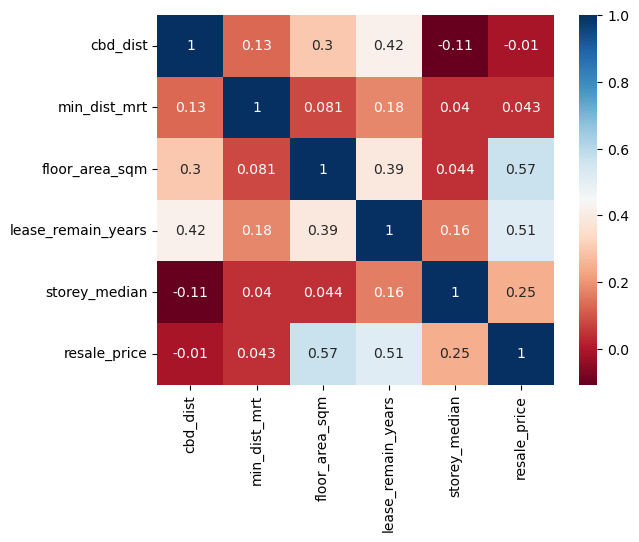

In [33]:
import seaborn as sns

corrMatrix = scope_df.corr()
sns.heatmap(corrMatrix, 
        xticklabels=corrMatrix.columns,
        yticklabels=corrMatrix.columns,
        cmap='RdBu', # https://matplotlib.org/stable/tutorials/colors/colormaps.html
        annot=True)

# Training using Linear Regression

In [34]:
from sklearn.model_selection import train_test_split

X=scope_df.to_numpy()[:,:-1]
y=scope_df.to_numpy()[:,-1]

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.25) #consider 25% of data for prediction purpose

In [35]:
from sklearn.linear_model import LinearRegression

line = LinearRegression()
line.fit(X_train,y_train)
(line.intercept_,line.coef_)

(-310628.7500514673,
 array([ -12.1144329 ,  -14.82122216, 3105.9317157 , 7091.71902509,
        3949.53230866]))

In [36]:
def MSE(ys, y_hats):
    # ys, and y_hats are a np.array() with shape (n,)
    n = len(ys)
    differences = ys - y_hats
    squared_diffs = differences ** 2
    summed_squared_differences = sum(squared_diffs)
    return (1/n) * summed_squared_differences

In [37]:
MSE(line.predict(X_train),y_train)


12113273117.328733

In [38]:
line.score(X_train, y_train)


0.5405023411863208

In [39]:
import statsmodels.api as sm

X = scope_df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y = scope_df["resale_price"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                 1.974e+05
Date:                Sat, 22 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:02:59   Log-Likelihood:            -1.0924e+07
No. Observations:              838592   AIC:                         2.185e+07
Df Residuals:                  838586   BIC:                         2.185e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.105e+05    790.793   -392.685      0.000   -3.12e+05   -3.09e+05
cbd_dist             -12.0752      0.031   -386.801      0.000     -12.136     -12.014
min_dist_mrt         -14.9562      0.300    -49.867      0.000     -15.544     -14.368
floor_area_sqm      3106.4446      5.144    603.851      0.000    3096.362    3116.527
lease_remain_years  7081.1290     13.998    505.856      0.000    7053.693    7108.565
storey_median       3969.5141     25.793    153.896      0.000    3918.960    4020.068
==============================================================================
Omnibus:                    48938.765   Durbin-Watson:                   0.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63882.189
Skew:                           0.557   Prob(JB):                         0.00
Kurtosis:                       3.767   Cond. No.                     8.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
summary = scope_df.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
cbd_dist,838592.0,12159.154199,4387.681703,592.121638,9256.365832,12873.779302,15490.084356,2.240556e+04
min_dist_mrt,838592.0,748.299679,407.723990,36.079525,450.224347,679.406116,959.089892,5.475017e+03
floor_area_sqm,838592.0,96.800646,25.680544,31.000000,73.000000,95.000000,115.000000,3.070000e+02
lease_remain_years,838592.0,64.281431,10.240557,42.000000,57.000000,62.000000,72.000000,9.500000e+01
storey_median,838592.0,7.672172,4.816448,2.000000,5.000000,8.000000,11.000000,5.000000e+01
resale_price,838592.0,317797.371485,162282.316332,5000.000000,198000.000000,297000.000000,410000.000000,1.418000e+06


In [41]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(scope_df["resale_price"], predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(scope_df["resale_price"], predictions)))

Mean Absolute Error: 86701.12336634212
Root Mean Squared Error: 109984.24972634758


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["explanatory variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(X)

,explanatory variables,VIF
0,const,43.352275
1,cbd_dist,1.300679
2,min_dist_mrt,1.036668
3,floor_area_sqm,1.209937
4,lease_remain_years,1.424571
5,storey_median,1.069941


# Using another method to do the prediction 



In [6]:
df_1 = pd.read_csv('HDB Resale Price from 1990 to 2023.csv')

In [7]:
df_1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,53,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,53,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,53,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,53,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,52,47200.0


In [8]:
#let's break date to years, months
df_1['date'] = pd.to_datetime(df_1['month'])
df_1['month'] = df_1['date'].apply(lambda date:date.month)
df_1['year'] = df_1['date'].apply(lambda date:date.year)

#Get number of years left on lease as a continuous number (ignoring months)
#df_1['remaining_lease'] = df_1['remaining_lease'].apply(lambda remaining_lease:remaining_lease[:2])

#Get storey range as a continuous number
df_1['storey_range'] = df_1['storey_range'].apply(lambda storey_range:storey_range[:2])

In [9]:
df_1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,date,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10,31.0,IMPROVED,1977,53,9000.0,1990-01-01,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04,31.0,IMPROVED,1977,53,6000.0,1990-01-01,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10,31.0,IMPROVED,1977,53,8000.0,1990-01-01,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07,31.0,IMPROVED,1977,53,6000.0,1990-01-01,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04,73.0,NEW GENERATION,1976,52,47200.0,1990-01-01,1990


In [10]:
df_1['address'] = df_1['block'] + " " + df_1['street_name']
df_1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,date,year,address
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10,31.0,IMPROVED,1977,53,9000.0,1990-01-01,1990,309 ANG MO KIO AVE 1
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04,31.0,IMPROVED,1977,53,6000.0,1990-01-01,1990,309 ANG MO KIO AVE 1
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10,31.0,IMPROVED,1977,53,8000.0,1990-01-01,1990,309 ANG MO KIO AVE 1
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07,31.0,IMPROVED,1977,53,6000.0,1990-01-01,1990,309 ANG MO KIO AVE 1
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04,73.0,NEW GENERATION,1976,52,47200.0,1990-01-01,1990,216 ANG MO KIO AVE 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895385,3,YISHUN,EXECUTIVE,325,YISHUN CTRL,10,146.0,Maisonette,1988,65,800000.0,2023-03-01,2023,325 YISHUN CTRL
895386,3,YISHUN,EXECUTIVE,356,YISHUN RING RD,01,146.0,Maisonette,1988,65,800000.0,2023-03-01,2023,356 YISHUN RING RD
895387,3,YISHUN,EXECUTIVE,387,YISHUN RING RD,04,142.0,Apartment,1988,65,770000.0,2023-03-01,2023,387 YISHUN RING RD
895388,3,YISHUN,EXECUTIVE,792,YISHUN RING RD,10,146.0,Maisonette,1987,64,818000.0,2023-03-01,2023,792 YISHUN RING RD


In [12]:
address_list_1 = df_1['address'].unique()


In [14]:
latitude = []
longitude = []
blk_no = []
road_name = []
postal_code = []
address = []
count = 0

for row in range(len(address_list_1)): 
    query_address = address_list_1[row]
    query_string='https://developers.onemap.sg/commonapi/search?searchVal='+str(query_address)+'&returnGeom=Y&getAddrDetails=Y'
    resp = requests.get(query_string)          

     
    data_geo_location=json.loads(resp.content)
    if data_geo_location['found'] != 0:
        latitude.append(data_geo_location['results'][0]['LATITUDE'])
        longitude.append(data_geo_location['results'][0]['LONGITUDE'])
        blk_no.append(data_geo_location['results'][0]['BLK_NO'])
        road_name.append(data_geo_location['results'][0]['ROAD_NAME'])
        postal_code.append(data_geo_location['results'][0]['POSTAL'])
        address.append(query_address)
        print (str(query_address) + " ,Lat: " + data_geo_location['results'][0]['LATITUDE'] + " Long: " + data_geo_location['results'][0]['LONGITUDE'])
    else:
        print ("No Results")

No Results
216 ANG MO KIO AVE 1 ,Lat: 1.36619678831054 Long: 103.841505011903
211 ANG MO KIO AVE 3 ,Lat: 1.369196965617 Long: 103.841666636086
202 ANG MO KIO AVE 3 ,Lat: 1.36845752328237 Long: 103.844515336938
235 ANG MO KIO AVE 3 ,Lat: 1.36682360872342 Long: 103.83649123351
232 ANG MO KIO AVE 3 ,Lat: 1.36834606813391 Long: 103.837196046409
308 ANG MO KIO AVE 1 ,Lat: 1.36569665029696 Long: 103.844347269095
220 ANG MO KIO AVE 1 ,Lat: 1.36558833593063 Long: 103.840518883254
219 ANG MO KIO AVE 1 ,Lat: 1.36598198004505 Long: 103.840654039612
No Results
320 ANG MO KIO AVE 1 ,Lat: 1.3655924562134 Long: 103.848386744168
No Results
223 ANG MO KIO AVE 1 ,Lat: 1.36604808445916 Long: 103.838122716883
230 ANG MO KIO AVE 3 ,Lat: 1.36885445228086 Long: 103.837896397823
329 ANG MO KIO AVE 3 ,Lat: 1.3665990830055 Long: 103.846874423696
313 ANG MO KIO AVE 3 ,Lat: 1.36664972640598 Long: 103.850133665442
117 ANG MO KIO AVE 4 ,Lat: 1.3737170825368 Long: 103.835610469339
110 ANG MO KIO AVE 4 ,Lat: 1.370459

In [15]:
df_coordinates = pd.DataFrame({
    'latitude': latitude,
    'longitude': longitude,
    'blk_no': blk_no,
    'road_name': road_name,
    'postal_code': postal_code,
    'address': address
})
len(df_coordinates)

9605

In [16]:
df_1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,date,year,address
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10,31.0,IMPROVED,1977,53,9000.0,1990-01-01,1990,309 ANG MO KIO AVE 1
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04,31.0,IMPROVED,1977,53,6000.0,1990-01-01,1990,309 ANG MO KIO AVE 1
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10,31.0,IMPROVED,1977,53,8000.0,1990-01-01,1990,309 ANG MO KIO AVE 1
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07,31.0,IMPROVED,1977,53,6000.0,1990-01-01,1990,309 ANG MO KIO AVE 1
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04,73.0,NEW GENERATION,1976,52,47200.0,1990-01-01,1990,216 ANG MO KIO AVE 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895385,3,YISHUN,EXECUTIVE,325,YISHUN CTRL,10,146.0,Maisonette,1988,65,800000.0,2023-03-01,2023,325 YISHUN CTRL
895386,3,YISHUN,EXECUTIVE,356,YISHUN RING RD,01,146.0,Maisonette,1988,65,800000.0,2023-03-01,2023,356 YISHUN RING RD
895387,3,YISHUN,EXECUTIVE,387,YISHUN RING RD,04,142.0,Apartment,1988,65,770000.0,2023-03-01,2023,387 YISHUN RING RD
895388,3,YISHUN,EXECUTIVE,792,YISHUN RING RD,10,146.0,Maisonette,1987,64,818000.0,2023-03-01,2023,792 YISHUN RING RD


In [18]:
df_1 = df_1.drop('street_name',axis=1)
df_1 = df_1.drop('date',axis=1)
df_1 = df_1.drop('block',axis=1)
df_1 = df_1.drop('lease_commence_date',axis=1)
df_1 = df_1.drop('month',axis=1)
df_1 = df_1.drop('address',axis=1)
df_1 = df_1.drop('year',axis=1)

In [19]:
df_1 = pd.get_dummies(df_1, columns=['town','flat_type','storey_range','flat_model'])
df_1.head()

,floor_area_sqm,remaining_lease,resale_price,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_SIMPLIFIED,flat_model_STANDARD,flat_model_Simplified,flat_model_Standard,flat_model_TERRACE,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,31.0,53,9000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31.0,53,6000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31.0,53,8000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31.0,53,6000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,73.0,52,47200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
len(df_1.columns)

94

In [21]:
X = df_1.drop('resale_price',axis =1)
y = df_1['resale_price']
X=X.values
y=y.values

In [22]:
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
# Let us print the first element in the array to have a look at the data
print(X_train[0])

[121.  66.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.]


In [23]:
#MinMax scaler - fit&transform on train, fit only on test
s_scaler = MinMaxScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))


C:\Users\Game\AppData\Local\Temp\ipykernel_21356\1580016834.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
C:\Users\Game\AppData\Local\Temp\ipykernel_21356\1580016834.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype(np.float))


In [24]:
print(X_train[0])

[0.34572491 0.42857143 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


In [1]:
import tensorflow.keras


In [27]:
# Creating a Neural Network Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
# having 74 neuron is based on the number of available features
model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(93,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse',metrics=['mse',"mae"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               9400      
                                                                 
 dense_21 (Dense)            (None, 128)               12928     
                                                                 
 dense_22 (Dense)            (None, 256)               33024     
                                                                 
 dense_23 (Dense)            (None, 512)               131584    
                                                                 
 dense_24 (Dense)            (None, 1024)              525312    
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 dense_26 (Dense)            (None, 256)              

In [28]:
%%time
history=model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=100)

Epoch 1/100
5247/5247 [==============================] - 101s 19ms/step - loss: 8525830144.0000 - mse: 8525830144.0000 - mae: 72149.1797 - val_loss: 7647034368.0000 - val_mse: 7647034368.0000 - val_mae: 70319.1562
Epoch 2/100
5247/5247 [==============================] - 112s 21ms/step - loss: 7523175936.0000 - mse: 7523175936.0000 - mae: 69184.9453 - val_loss: 7429370880.0000 - val_mse: 7429370880.0000 - val_mae: 68050.0859
Epoch 3/100
5247/5247 [==============================] - 106s 20ms/step - loss: 7334301184.0000 - mse: 7334301184.0000 - mae: 68151.0156 - val_loss: 7239803904.0000 - val_mse: 7239803904.0000 - val_mae: 68381.9297
Epoch 4/100
5247/5247 [==============================] - 107s 20ms/step - loss: 7168784384.0000 - mse: 7168784384.0000 - mae: 67098.3281 - val_loss: 7136551936.0000 - val_mse: 7136551936.0000 - val_mae: 68009.4922
Epoch 5/100
5247/5247 [==============================] - 111s 21ms/step - loss: 7058066432.0000 - mse: 7058066432.0000 - mae: 66443.5625 - val_l

In [29]:
model.evaluate(X_test,y_test)

6996/6996 [==============================] - 23s 3ms/step - loss: 6228446720.0000 - mse: 6228446720.0000 - mae: 62094.7383


[6228446720.0, 6228446720.0, 62094.73828125]

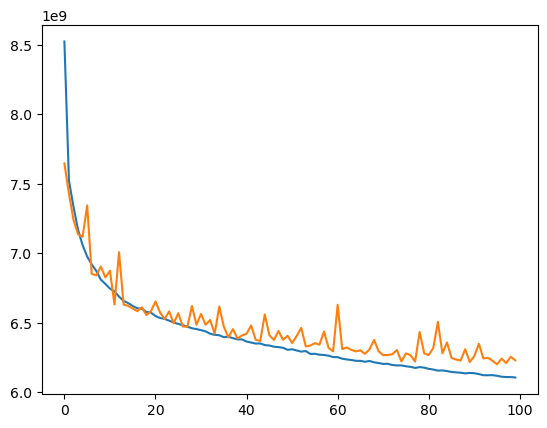

In [30]:
# plot metrics
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [33]:
y_pred = model.predict(X_test)
y_pred_2 = []
for pred in y_pred:
  y_pred_2.append(pred[0])

df_1  = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2})
df_1_F  = df_1.head(20)
df_1_F 

6996/6996 [==============================] - 24s 3ms/step


,Actual,Predicted
0,230000.0,327701.281250
1,155000.0,169636.968750
2,650000.0,614144.812500
3,490000.0,599363.875000
4,360000.0,212314.328125
5,282000.0,215628.031250
6,236000.0,262057.187500
7,450000.0,423698.093750
8,394000.0,446945.906250
9,510000.0,453591.062500
